<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_model_selection/Ejercicio_how_many_clusters_Ruben_Navas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import seaborn as sns; 
iris = sns.load_dataset("iris")
iris_num = iris.select_dtypes(include='number')
iris_num

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn import mixture
import numpy as np
import matplotlib.pyplot as plt

X=iris_num
NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))

[829.9781545093942]
[829.9781545093942, 574.017832720746]
[829.9781545093942, 574.017832720746, 580.8612784697606]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367, 674.3855163882336]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367, 674.3855163882336, 713.4459077596476]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367, 674.3855163882336, 713.4459077596476, 782.3315536173175]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367, 674.3855163882336, 713.4459077596476, 782.3315536173175, 772.192461695303]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367, 674.3855163882336, 713.4459077596476, 782.3315536173175, 772.192461695303, 752.7511440877387]
[829.9781545093942, 574.017832720746, 580.8612784697606, 629.833920578367, 674.3855163882336, 713.4459077596476, 782.3315536173175, 772.192461695303, 75

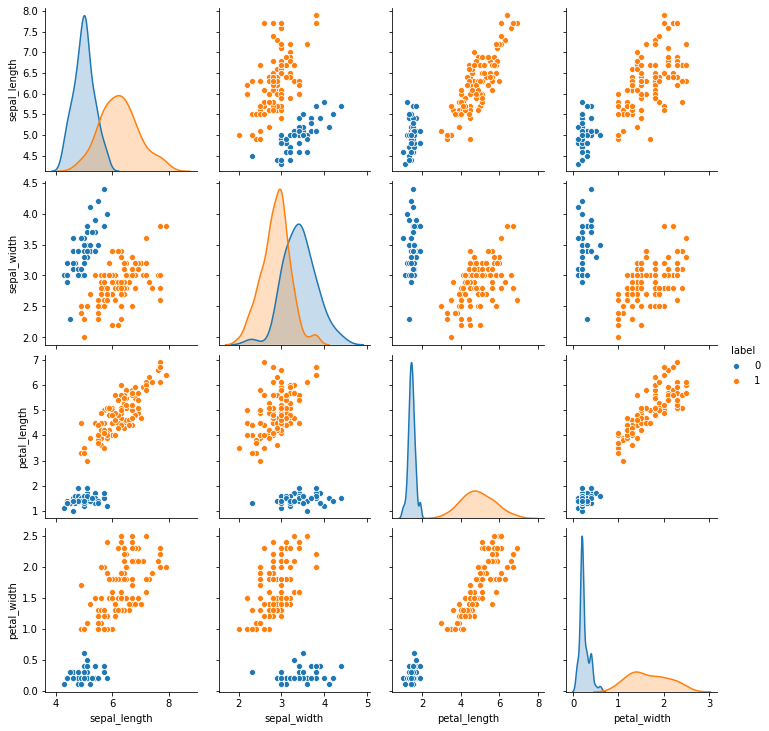

In [7]:
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(X)
grouped = gmm.predict(iris_num)
iris_num['label'] = grouped
g = sns.pairplot(iris_num, hue="label")